In [1]:
# Fig. S9

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy.stats import gaussian_kde
sns.set()

C_ATC = [0 ,10 ,20,40 ,60 ,80 ,100 ,150 ,250 ,500 ,750,1000]

In [3]:
def fold_change(lkns, el, gama,c, K=1):
    
    pref= 1/lkns -1
    numeratorfc = 1+np.exp(-el-gama)*((c/K)**2)
    denomenatorfc = 1+np.exp(-el)*((c/K)**2)
    
    FC = 1/(1+pref*numeratorfc/denomenatorfc)
    return FC

In [4]:
FCs_read = []
with open('FCdata.txt','r') as g: fclines=g.readlines()[0].split('$')[1:-1]
for each in fclines:
    tempfc=[]
    for eac in each[2:-2].split('], ['):
        tpfc=[float(ea) for ea in eac.split(',')]
        tempfc.append(tpfc)
    FCs_read.append(tempfc)
print(len(FCs_read))

23


In [5]:
# experimental leakiness of each mutant and the corresponding sem
with open('leak_info.txt','r') as g:
    alllines=g.readlines()[0][2:-2]
    
temp_leakraw, Leakns_info =alllines.split('], ['), []
for each in temp_leakraw:
    tplkr, templ =each.split(','), []
    for eac in tplkr: templ.append(float(eac))
    Leakns_info.append(templ)
print(np.shape(Leakns_info))

(23, 2)


In [6]:
# the inferred 1000 posterior samples (el,gama,sigma) for each mutant, taken from 1 million MC samples
with open('Inferred_Post_Samples.txt','r') as f: 
    alllines=f.readlines()
Post_Samples=[]
for each in alllines[2::2]:
    Temp=[]
    for eac in each[2:-3].split('], ['):
        temp=[float(ea) for ea in eac.split(',')]
        Temp.append(temp)
    Post_Samples.append(Temp[1:1001])
print(np.shape(Post_Samples))

(23, 1000, 3)


In [26]:
egps = np.asarray(Post_Samples[13])

### Fig. S9A

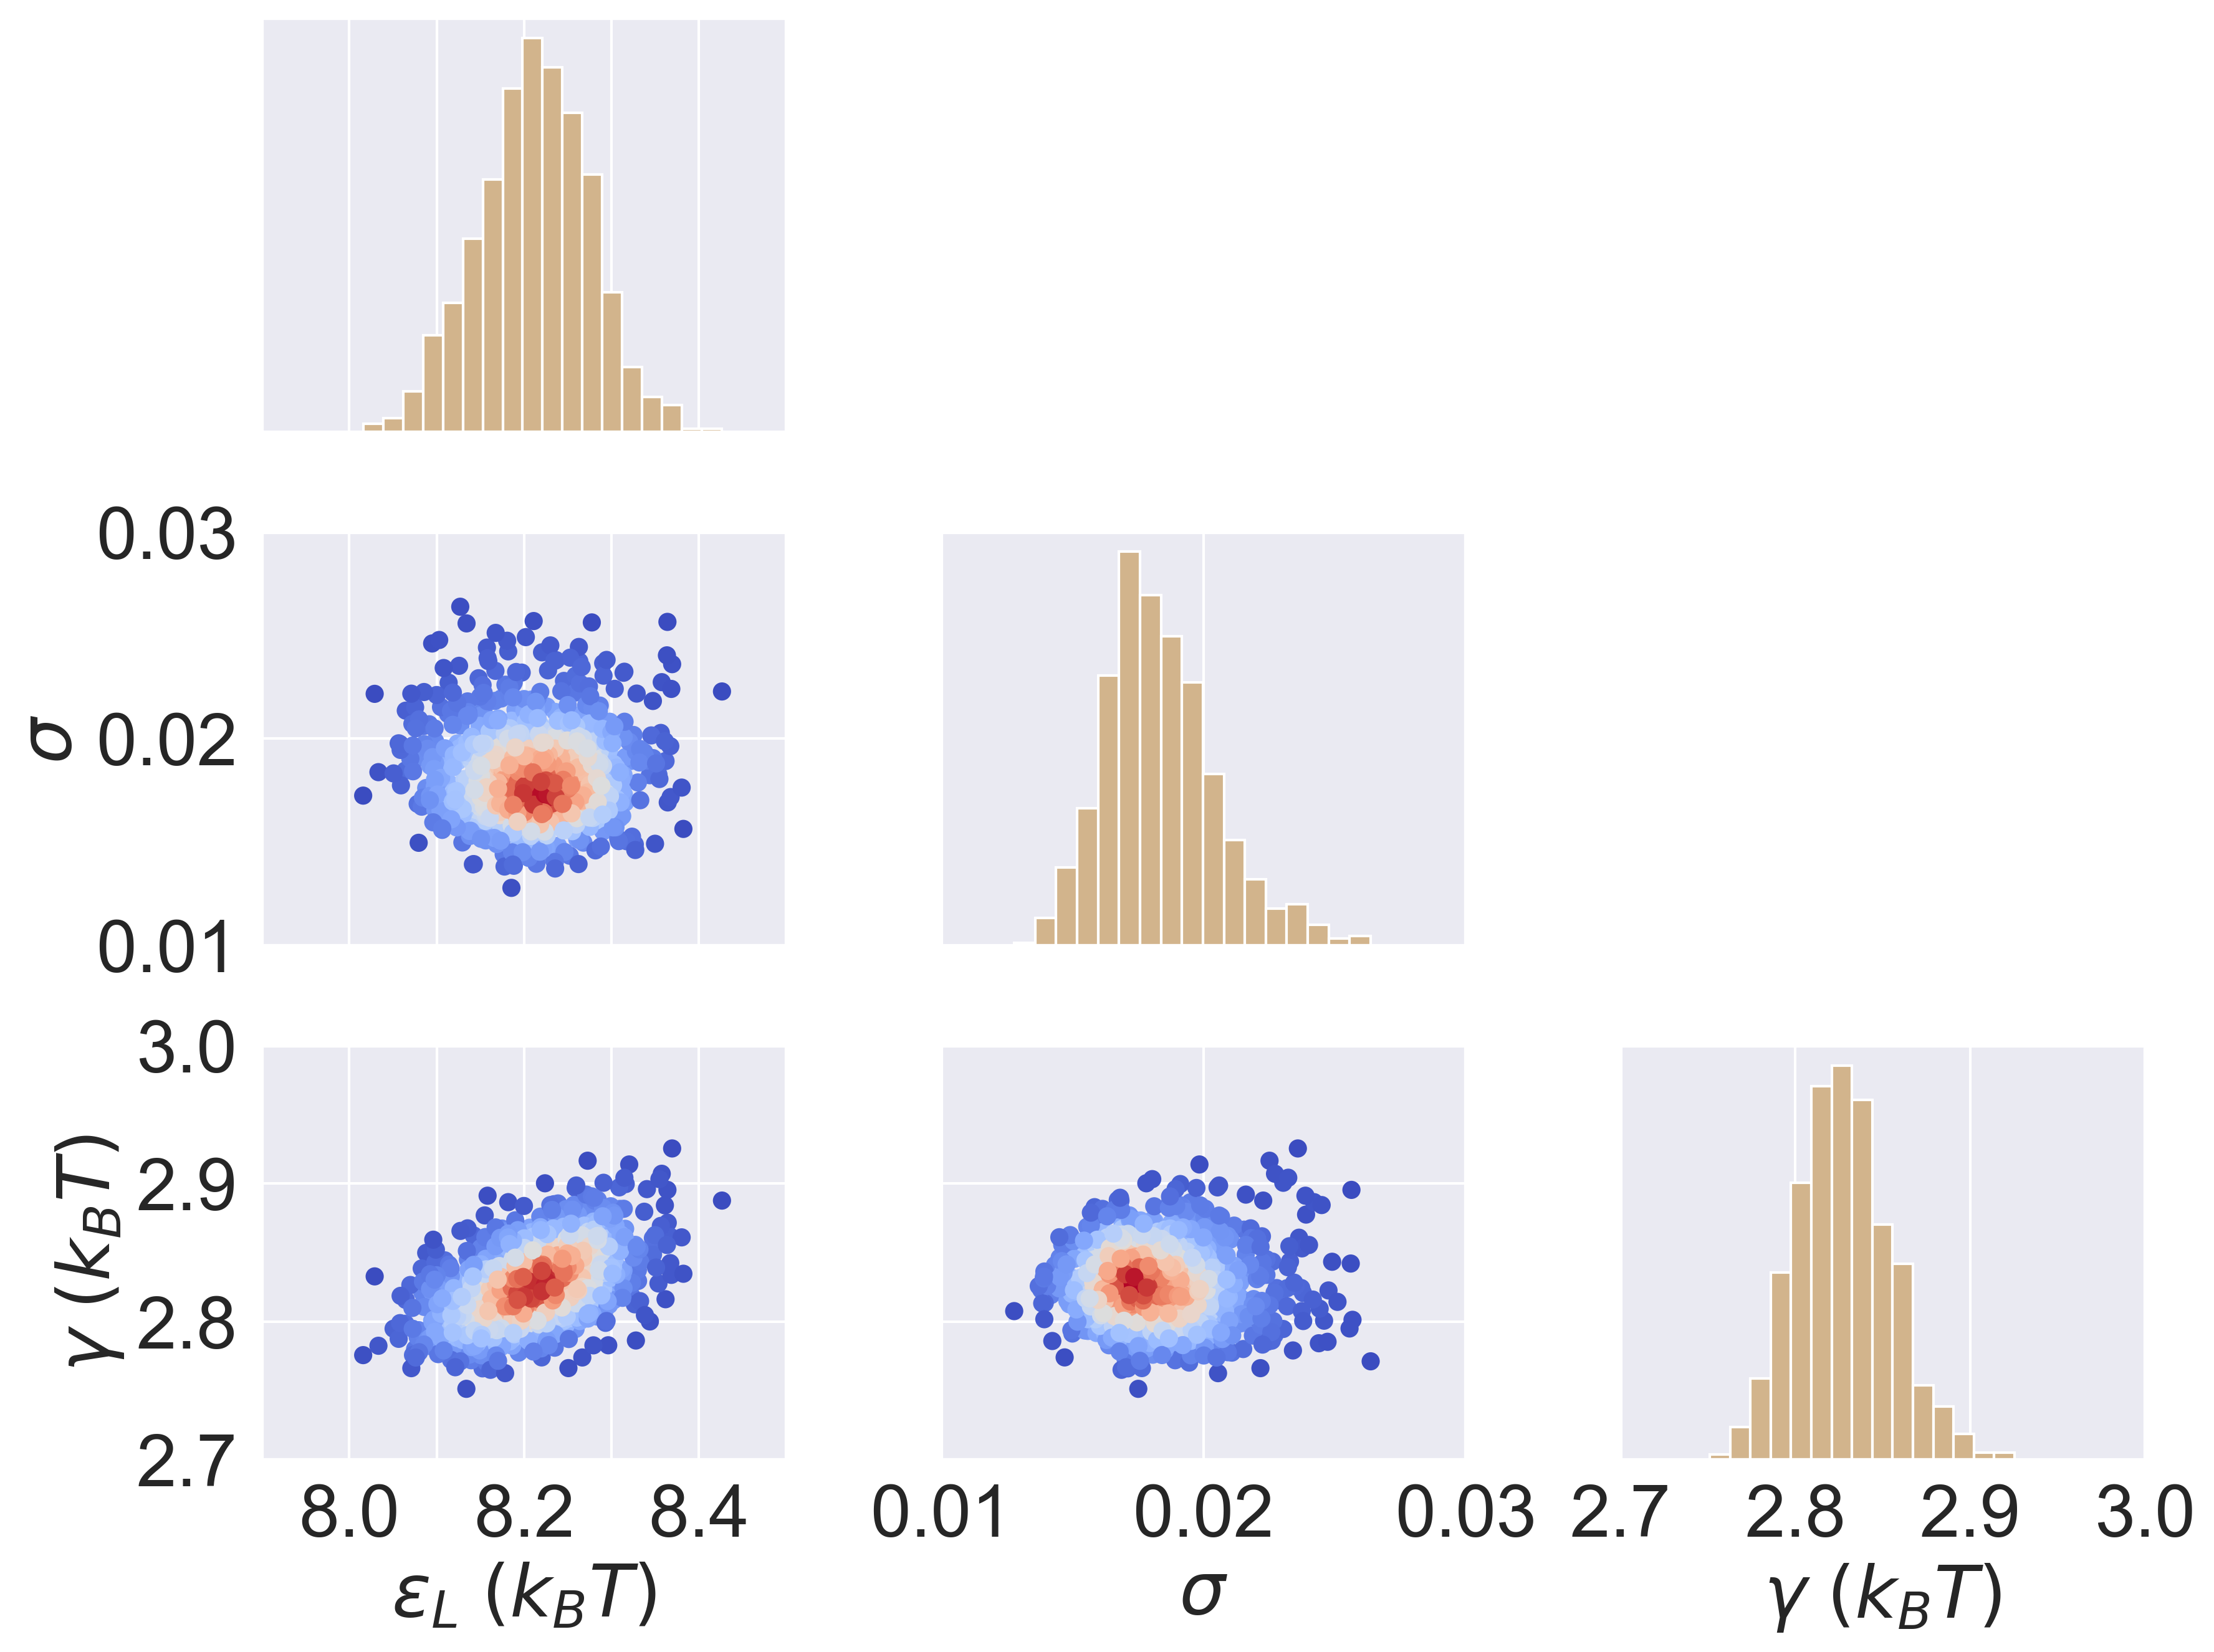

In [141]:
Postsample_eg = plt.figure(figsize=(12,9),dpi=300)

lablsiz=28
histcolor='tan'

ps1 = Postsample_eg.add_subplot(331)
ps1.hist(egps[:,0],bins=18, color=histcolor)
ps1.set_xlim(7.9,8.5)
ps1.set_yticks([])
ps1.set_xticks(np.arange(7.9,8.6,0.1))
ps1.axes.xaxis.set_ticklabels([])

ps4 = Postsample_eg.add_subplot(334)
x=egps[:,0]
y=egps[:,2]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ps4.scatter(x, y,c=z,cmap='coolwarm')
ps4.set_xlim(7.9,8.5)
ps4.set_yticks(np.arange(0.01,0.031,0.01))
ps4.set_xticks(np.arange(7.9,8.6,0.1))
ps4.set_ylabel('$\sigma$', fontsize=lablsiz)
ps4.tick_params(labelsize=lablsiz)
ps4.axes.xaxis.set_ticklabels([])

ps5 = Postsample_eg.add_subplot(335)
ps5.hist(egps[:,2],bins=17,color=histcolor)
ps5.set_xlim(0.01,0.03)
ps5.set_yticks([])
ps5.set_xticks(np.arange(0.01,0.031,0.01))
ps5.axes.xaxis.set_ticklabels([])

ps7 = Postsample_eg.add_subplot(337)
x=egps[:,0]
y=egps[:,1]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ps7.scatter(x, y,c=z,cmap='coolwarm')
ps7.set_xlim(7.9,8.5)
ps7.set_yticks(np.arange(2.7,3.011,0.1))
ps7.set_xticks(np.arange(7.9,8.6,0.1))
ps7.set_ylabel('$\gamma$ $(k_BT)$', fontsize=lablsiz)
ps7.set_xlabel('$\epsilon_L$ $(k_BT)$', fontsize=lablsiz)
ps7.tick_params(labelsize=lablsiz)
ps7.axes.xaxis.set_ticklabels(['',8.0,'',8.2,'',8.4,''])

ps8 = Postsample_eg.add_subplot(338)
x=egps[:,2]
y=egps[:,1]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ps8.scatter(x, y,c=z,cmap='coolwarm')
ps8.set_xlim(0.01,0.03)
ps8.set_yticks(np.arange(2.7,3.011,0.1))
ps8.set_xticks(np.arange(0.01,0.031,0.01))
ps8.set_xlabel('$\sigma$', fontsize=lablsiz)
ps8.axes.yaxis.set_ticklabels([])
ps8.tick_params(labelsize=lablsiz)

ps9 = Postsample_eg.add_subplot(339)
ps9.hist(egps[:,1],bins=15,color=histcolor)
ps9.set_xlim(2.7,3)
ps9.set_yticks([])
ps9.set_xticks(np.arange(2.7,3.01,0.1))
ps9.tick_params(labelsize=lablsiz)
ps9.set_xlabel(r'$\gamma$ $(k_BT)$',fontsize=lablsiz)


Postsample_eg.tight_layout()
Postsample_eg.savefig('New_Figures/FigS9A_postsample.png',dpi=300,bbox_inches='tight',pad_inches=0.01)

### Fig. S9B

In [24]:
def goodness_of_fit(lkns,paraminfered_mutant,DATA4,name,limyh=1.,limyl=-0.02, yticks=np.arange(-0.,1.1,0.2),ylabelpad=None):
    mc_step=len(paraminfered_mutant)
    
    Us=[] # 4001*12 4001 sets of params, 12 expectation for 12concentrations for each set of param
    for each in paraminfered_mutant:
        tempu=[]
        for c in C_ATC:
            tempu.append(fold_change(lkns,each[0],each[1],c))
        Us.append(tempu)
    ## for each set of params, generate 48 fold changes
    predict_fc=[]
    for i in range(mc_step):
        temp12=[]
        for j in range(12):
            temp=[]
            for k in range(4):
                temp.append(np.random.normal(Us[i][j],paraminfered_mutant[i][2]))
            temp12.append(temp)
        predict_fc.append(temp12)
    
    fc_predict_12=[]
    for m in range(12):
        tempm=[]
        for n in range(mc_step):
            for each in predict_fc[n][m]:
                tempm.append(each)
        fc_predict_12.append(np.sort(tempm))
    
    # next, plot the predictive fold change from the infered 4001 sets of param
    fc_median=[]
    fc_up5,fc_low5=[],[]
    fc_up10,fc_low10=[],[]
    fc_up20,fc_low20=[],[]
    fc_up50,fc_low50=[],[]
    fc_up80,fc_low80=[],[]
    fc_up95,fc_low95=[],[]
    fc_up99,fc_low99=[],[]
    
    mc_step*=4
#     print(mc_step)
    
    for i in range(12):
        fc_median.append(np.median(fc_predict_12[i]))
        fc_up5.append(fc_predict_12[i][round(mc_step*0.95/2)])
        fc_low5.append(fc_predict_12[i][-round(mc_step*0.95/2)])
        fc_up10.append(fc_predict_12[i][round(mc_step*0.9/2)])
        fc_low10.append(fc_predict_12[i][-round(mc_step*0.9/2)])
        fc_up20.append(fc_predict_12[i][round(mc_step*0.8/2)])
        fc_low20.append(fc_predict_12[i][-round(mc_step*0.8/2)])
        fc_up50.append(fc_predict_12[i][round(mc_step*0.5/2)])
        fc_low50.append(fc_predict_12[i][-round(mc_step*0.5/2)])
        fc_up80.append(fc_predict_12[i][round(mc_step*0.2/2)])
        fc_low80.append(fc_predict_12[i][-round(mc_step*0.2/2)])
        fc_up95.append(fc_predict_12[i][round(mc_step*0.05/2)])
        fc_low95.append(fc_predict_12[i][-round(mc_step*0.05/2)])
        fc_up99.append(fc_predict_12[i][round(mc_step*0.01/2)])
        fc_low99.append(fc_predict_12[i][-round(mc_step*0.01/2)])
    FC_pred_plot = plt.figure(figsize=(8,6))  # Fold-change predict plot
    fcpred = FC_pred_plot.add_subplot(1,1,1)
    
    color1,color2,color3,color4,color5,color6,color7 = 'darkblue','royalblue','steelblue','cornflowerblue','skyblue','lightskyblue','lightsteelblue'
    fcpred.fill_between(C_ATC, fc_up5, fc_low5, alpha=1,label='5',color=color1)
    fcpred.fill_between(C_ATC, fc_up10, fc_up5, alpha=.85,label='10',color=color2)
    fcpred.fill_between(C_ATC, fc_low5, fc_low10, alpha=.85,color=color2)
    fcpred.fill_between(C_ATC, fc_up20, fc_up10, alpha=.7,label='20',color=color3)
    fcpred.fill_between(C_ATC, fc_low10, fc_low20, alpha=.7,color=color3)
    fcpred.fill_between(C_ATC, fc_up50, fc_up20, alpha=.55,label='50',color=color4)
    fcpred.fill_between(C_ATC, fc_low20, fc_low50, alpha=.55,color=color4)
    fcpred.fill_between(C_ATC, fc_up80, fc_up50, alpha=.4,label='80',color=color5)
    fcpred.fill_between(C_ATC, fc_low50, fc_low80, alpha=.4,color=color5)
    fcpred.fill_between(C_ATC, fc_up95, fc_up80, alpha=.25,label='95',color=color6)
    fcpred.fill_between(C_ATC, fc_low80, fc_low95, alpha=.25,color=color6)
    fcpred.fill_between(C_ATC, fc_up99, fc_up95, alpha=.1,label='99',color=color7)
    fcpred.fill_between(C_ATC, fc_low95, fc_low99, alpha=.1,color=color7)
#     colorshade='pink'
    L1=len(DATA4[0])
    fcpred.plot(C_ATC[:L1],DATA4[0],'o', mfc='white',mec='black',mew=1,markersize=8,label='data')
    for m in range(1,len(DATA4)-1):
        Lm = len(DATA4[m])
        fcpred.plot(C_ATC[:Lm],DATA4[m][:Lm],'o', mfc='white',mec='black',mew=1,markersize=8)
            
    fcpred.tick_params(labelsize=36) # make ticks bigger
    fcpred.set_ylim([limyl, limyh])
    fcpred.set_xlim([-1, 1300])
    fcpred.set_yticks(yticks)
    fcpred.set_ylabel('Fold Change', fontsize = 36)
    l = fcpred.legend(bbox_to_anchor=(-0.02, 1.07), loc='upper left',handletextpad=0.2, columnspacing=0.5,handlelength=0.8,ncol=3,fontsize=36,title='percentile',title_fontsize=36,frameon=False)
    if ylabelpad:
        fcpred.set_ylabel('Fold Change', fontsize = 36,labelpad=25)
    fcpred.set_xlabel('Ligand Concentration (nM)', fontsize = 36)

    fcpred.set_xscale('symlog',linthresh=10)
    
    FC_pred_plot.savefig('New_Figures/FigS9B.png'.format(name),dpi=300,bbox_inches='tight',pad_inches=0.01)
    FC_pred_plot.savefig('New_Figures/FigS9B.pdf'.format(name),dpi=300,bbox_inches='tight',pad_inches=0.01)
    

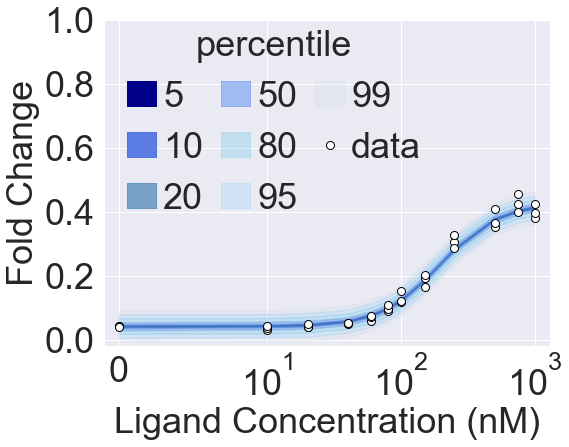

In [25]:
goodness_of_fit(Leakns_info[13][0], Post_Samples[13], FCs_read[13][1:],'G102D-Y42M-I57N')  

In [142]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [143]:
figlist_FigS9 = ['New_Figures/FigS9A_postsample.png', 'New_Figures/FigS9B.png']

In [152]:
images_FigS9 = [Image.open(x) for x in figlist_FigS9]
widths, heights = zip(*(i.size for i in images_FigS9))

total_width = (sum(widths[:1])+50)
max_height = (sum(heights[:2])+260)

FigS9 = Image.new('RGB', (total_width, max_height),color='white')
draw = ImageDraw.Draw(FigS9)
font = ImageFont.truetype('/Library/Fonts/Arial.ttf', size=250)

x_offset=50
FigS9.paste(images_FigS9[0], (x_offset, 50))
draw.text((0, 0), 'A', font=font, fill='black')

x_offset=int((50+widths[0]-widths[1])/2)
y_offset=heights[0]+250
FigS9.paste(images_FigS9[1], (x_offset, y_offset))
draw.text((0, y_offset-50), 'B', font=font, fill='black')
    
FigS9.save('New_Figures/FigS9.png')
FigS9.save('New_Figures/FigS9.pdf')